# Systematic Evaluation of Supervised Learning Algorithms in Credit Fraud Detection and the Impact of PCA-1 Augmentation
*Hannah Laper and Adam Wachsman*
 
 
 
In this notebook we explored the creditcard.csv dataset.  This notebook gives anonymized information, the amount of the transaction, and whether the transaction is fraudulent (0 is normal, 1 is fraud).

In this notebook, we looked at different classification machine learning techniques to see which have the best accuracy and precision.  We did logistic regression, SVM, random forest, and Neural Networks to see which model has the best accuracy. In addition, we tested these models using a version of the dataset augmented with outlier scores based on PCA reconstruction error

In [ ]:
#Import Neccessary Libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Display library versions
print('Numpy ver.',np.__version__)
print('Pandas ver.',pd.__version__)
from sklearn import __version__ as sklearnversion
print('scikitlearn ver.',sklearnversion)
from mlxtend import __version__ as mlxversion
print('mlxtend ver.',mlxversion)
from keras import __version__ as kerasversion
print('keras ver.',kerasversion)

Numpy ver. 1.18.5
Pandas ver. 1.1.3
scikitlearn ver. 0.23.2
mlxtend ver. 0.18.0
keras ver. 2.4.3


In [ ]:
# matplotlib and seaborn do not seem to use typical versioning conventions,
# versions accessed using pip instead
!pip show matplotlib

Name: matplotlib
Version: 3.3.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\adam\anaconda3\lib\site-packages
Requires: kiwisolver, pillow, certifi, python-dateutil, numpy, cycler, pyparsing
Required-by: seaborn, scikit-image, mlxtend


In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.11.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\adam\anaconda3\lib\site-packages
Requires: numpy, pandas, matplotlib, scipy
Required-by: 


Code for retrieving datasets from a shared Google Drive commented out; recommended to upload dataset and insert its directory path into pd.read_csv in the subsequent block

In [ ]:
# # Import PyDrive and associated libraries.
# # This only needs to be done once per notebook.
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # Download a file based on its file ID.
# #
# # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# creditcard_id = '1p_GsFqkM4_k9Xs5i_eF_-xia05FWiaFI'

#Create a dataframe of the data
# creditcardcsv = drive.CreateFile({'id': creditcard_id})
# creditcardcsv.GetContentFile(filename='creditcard.csv')

In [ ]:
# Insert creditcard.csv filepath in place of this
df = pd.read_csv('.\\Documents\\Projects\\fraudject TURBO\\creditcard.csv')

print(df.shape)
#df.info()
df.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Find the amount of fraud in the dataset.
print("Number of fraudulent transactions is", (df['Class']== 1 ).sum())
print("The total number of transactions is", len(df['Class']))
percent_fraud = round(((df['Class']== 1 ).sum())/(len(df['Class'])) * 100, 2)
print('There is', percent_fraud, '% fraud in the dataframe')

Number of fraudulent transactions is 492
The total number of transactions is 284807
There is 0.17 % fraud in the dataframe


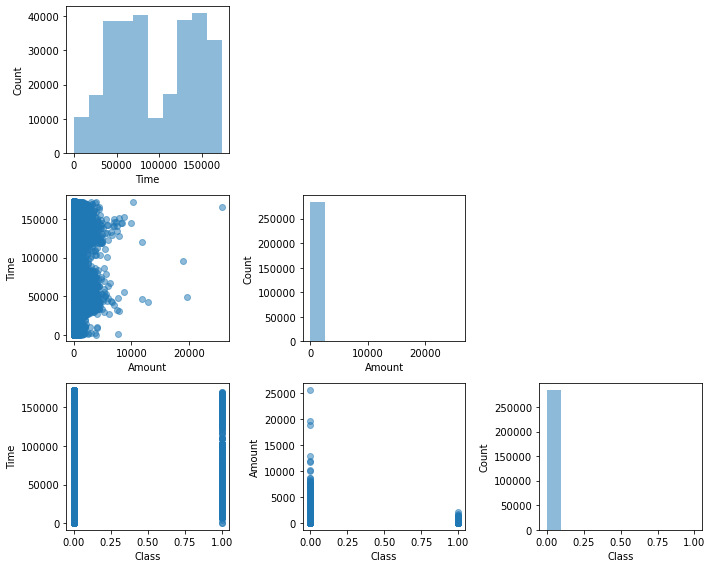

In [ ]:
#visualize data using a scatterplot matrix
cols = ['Time', 'Amount', 'Class']
scatterplotmatrix(df[cols].values, figsize = (10, 8), names = cols, alpha = 0.5)
plt.tight_layout()
plt.show()

I have evaluated the dataset and found that it is already clean.  I also discovered there is an average amount of $88, and 0.17% of the data is classified fraudulent. I also visulazied the data using a scatterplot matrix, from this it is clear that I need to use classification models.



### Logistic Regression


##### Split the data into Training and Testing
In order to evaluate the effectiveness of our models, we need to split the data into training and testing.
We will use this in all of the following models.

In [ ]:
#Set the features and target
features = df.drop(['Class'], axis=1)
target = df['Class']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=3)

In [ ]:
#Logistic Regression with Grid Search
start_time = time.time()
#Find the best parameters
LogReg = GridSearchCV(LogisticRegressionCV(random_state = 123, class_weight = 'balanced'), {
    'max_iter': [4000, 5000, 10000]
} ,cv = 5)
#Train the model
LogReg.fit(X_train, y_train)

end_time = time.time()
print(f'Process time: {((end_time-start_time)/60):.1f} minutes')
#Identify the best parameters
print("Best parameters", LogReg.best_params_)

#Predict the response for the test set
y_pred = LogReg.predict(X_test)
#Find the accuracy, precision, and recall
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Logistic Regression Precision:", metrics.precision_score(y_test, y_pred))
print("Logistic Regression Recall:", metrics.recall_score(y_test, y_pred))


Process time: 1.6 minutes
Best parameters {'max_iter': 4000}
Logistic Regression Accuracy: 0.9722973210210316
Logistic Regression Precision: 0.055756117127958284
Logistic Regression Recall: 0.9144736842105263


In [ ]:
#Look at Classification Report
print(classification_report(y_test, y_pred))
# Confusion Matrix
cf_matrix=confusion_matrix(y_test, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85291
           1       0.06      0.91      0.11       152

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.98     85443

[[82937  2354]
 [   13   139]]


Text(0.5, 15.0, 'Predicted')

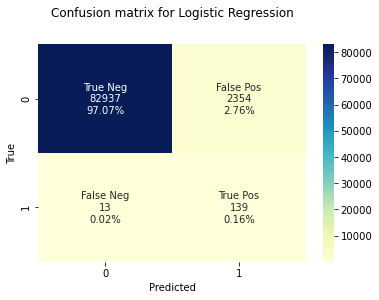

In [ ]:
#Visualize the confusion matrix using seaborn
cf_matrix=confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
# Create helper function to add to sklearn's built-in receiver operating characteristic
# plotting function

def roc_plot_enhanced(classifier, xtest, ytest, title = None):
    """
    Adds additional landmarks to sklearn's built-in roc_curve plotting function,
    namely a baseline and a horizontal rule at TPR = 1.0
    """
    metrics.plot_roc_curve(classifier, xtest, ytest)
    #Plot baseline ROC curve
    plt.plot([0,1],[0,1],c = 'black', linestyle = 'dashed')
    # Plot at TPR = 1.0 to better visualize the FPR at which TPR becomes 1
    plt.hlines(1.0, 0, 1, colors = 'red', linestyles = 'dashed', alpha = 0.5)
    
    plt.xlim([0,1])
    plt.ylim([0,1.1])
    
    plt.title(title)
    
    plt.show()

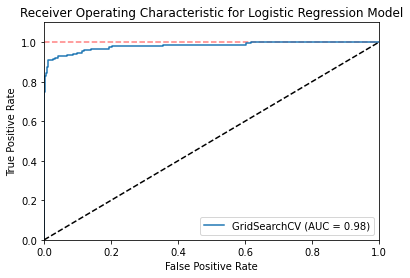

In [ ]:
roc_plot_enhanced(LogReg, X_test, y_test,
                  title = 'Receiver Operating Characteristic for Logistic Regression Model')

Work Cited
* <https://towardsdatascience.com/python-scikit-learn-logistic-regression-classification-eb9c8de8938d>
* <https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5>
* <https://www.youtube.com/watch?v=HdlDYng8g9s>
* <https://www.youtube.com/watch?v=pooXM9mM7FU>


### Support Vector Machine SVM

In [ ]:
#Create a SVM Classifier
start_time = time.time()
SVMclf = svm.SVC(kernel='linear',random_state = 123, C = 0.1, class_weight = 'balanced')

#Train the model using the training sets
SVMclf.fit(X_train, y_train)
end_time = time.time()
print(f'Grid search process time: {((end_time-start_time)/60):.1f} minutes')
#Predict the response for test dataset
y_pred_svm = SVMclf.predict(X_test)

#Find the accuracy, precision, and recall
print("SVM Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))
print("SVM Precision:", metrics.precision_score(y_test, y_pred_svm))
print("SVM Recall:", metrics.recall_score(y_test, y_pred_svm))


Grid search process time: 118.1 minutes
SVM Accuracy: 0.9874185129267465
SVM Precision: 0.11120471777590564
SVM Recall: 0.868421052631579


In [ ]:
#Look at Classification Report
print(classification_report(y_test, y_pred_svm))
# Confusion Matrix
cf_matrix=confusion_matrix( y_test, y_pred_svm)
print(cf_matrix)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85291
           1       0.11      0.87      0.20       152

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443

[[84236  1055]
 [   20   132]]


Text(0.5, 15.0, 'Predicted')

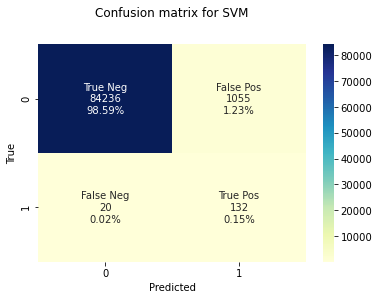

In [ ]:
#Visualize the confusion matrix using seaborn
cf_matrix=confusion_matrix(y_test, y_pred_svm)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')

plt.title('Confusion matrix for SVM', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

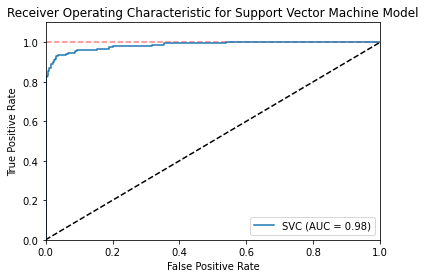

In [ ]:
roc_plot_enhanced(SVMclf, X_test, y_test,
                  title = 'Receiver Operating Characteristic for Support Vector Machine Model')

Grid search for model tuning

In [1]:
# #GridSearch Version
# start_time = time.time()
# clf_gs = GridSearchCV(svm.SVC(kernel = 'linear', random_state = 123, class_weight= 'balanced'), {
#     'C' : [0.1, 1, 10],
# }, )

# #Train the model using the training sets
# clf_gs.fit(X_train, y_train)

# end_time = time.time()
# print(f'Grid search process time: {((end_time-start_time)/60):.1f} minutes')
# #Identify the best parameters
# print("Best parameters", clf_gs.best_params_)

# #Predict the response for test dataset
# y_pred_gs = clf_gs.predict(X_test)

# #Find the accuracy, precision, and recall
# print("SVM Accuracy:", metrics.accuracy_score(y_test, y_pred_gs))
# print("SVM Precision:", metrics.precision_score(y_test, y_pred_gs))
# print("SVM Recall:", metrics.recall_score(y_test, y_pred_gs))

In [ ]:
# #Look at Classification Report
# print(classification_report(y_test, y_pred_gs))
# # Confusion Matrix
# cf_matrix=confusion_matrix(y_test, y_pred_gs)
# print(cf_matrix)

In [ ]:
# #Visualize the confusion matrix using seaborn
# cf_matrix=confusion_matrix(y_test, y_pred_gs)
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in
#                 cf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')
# ax.xaxis.set_label_position("top")
# plt.title('Confusion matrix for SVM GridSearch', y=1.1)
# plt.ylabel('True')
# plt.xlabel('Predicted')

##### Work Cited
* <https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769>


### Random Forest

In [ ]:
#Create a Random Forest Classifier
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state= 123, class_weight= 'balanced')

#Train the model using the training sets
rf_clf.fit(X_train, y_train)
end_time = time.time()
print(f'Grid search process time: {((end_time-start_time)/60):.1f} minutes')

#Predict the response for test dataset
y_pred_rf = rf_clf.predict(X_test)

#Find the accuracy, precision, and recall
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", metrics.precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", metrics.recall_score(y_test, y_pred_rf))

Grid search process time: 0.3 minutes
Random Forest Accuracy: 0.9980454806128062
Random Forest Precision: 0.47232472324723246
Random Forest Recall: 0.8421052631578947


In [ ]:
#Look at Classification Report
print(classification_report(y_test, y_pred_rf))
# Confusion Matrix
cf_matrix=confusion_matrix(y_test, y_pred_rf)
print(cf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.47      0.84      0.61       152

    accuracy                           1.00     85443
   macro avg       0.74      0.92      0.80     85443
weighted avg       1.00      1.00      1.00     85443

[[85148   143]
 [   24   128]]


Text(0.5, 15.0, 'Predicted')

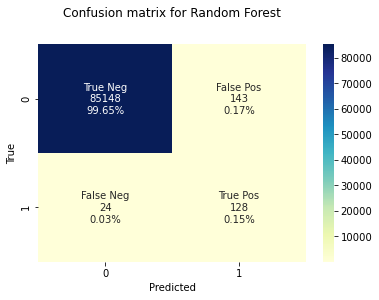

In [ ]:
#Visualize the confusion matrix using seaborn
cf_matrix=confusion_matrix(y_test, y_pred_rf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')

plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

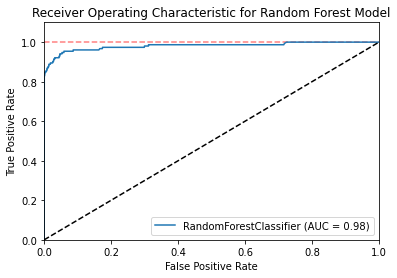

In [ ]:
roc_plot_enhanced(rf_clf, X_test, y_test, 
                  title = 'Receiver Operating Characteristic for Random Forest Model')

Randomized search for model tuning

In [2]:
# #GridSearch Version
# from sklearn.model_selection import RandomizedSearchCV
# #Create a Random Forest Classifier starting with a RandomizedSearchCV
# start_time = time.time()
# rfgs_clf = RandomizedSearchCV(RandomForestClassifier(random_state= 123, class_weight = 'balanced'), {
#     'n_estimators': [100, 200, 300, 1000],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#     'bootstrap': [True, False],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
# }, n_iter = 10, cv = 3, verbose = 2, random_state = 123, n_jobs = -1)

# #Train the model using the training sets
# rfgs_clf.fit(X_train, y_train)
# end_time = time.time()
# print(f'Grid search process time: {((end_time-start_time)/60):.1f} minutes')

# #Identify the best parameters
# print("Best parameters", rfgs_clf.best_params_)

# #Predict the response for test dataset
# y_pred_rfgs = rfgs_clf.predict(X_test)

# #Find the accuracy, precision, and recall
# print("SVM Accuracy:", metrics.accuracy_score(y_test, y_pred_rfgs))
# print("SVM Precision:", metrics.precision_score(y_test, y_pred_rfgs))
# print("SVM Recall:", metrics.recall_score(y_test, y_pred_rfgs))

In [ ]:
# #Look at Classification Report
# print(classification_report(y_test, y_pred_rfgs))
# # Confusion Matrix
# cf_matrix=confusion_matrix(y_test, y_pred_rfgs)
# print(cf_matrix)

In [ ]:
# #Visualize the confusion matrix using seaborn
# cf_matrix=confusion_matrix(y_test, y_pred_rfgs)
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in
#                 cf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')
# ax.xaxis.set_label_position("top")
# plt.title('Confusion matrix for Random Forest with Grid Search', y=1.1)
# plt.ylabel('True')
# plt.xlabel('Predicted')

##### Work Cited
* <https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74>
* <https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/>
* <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>
* <https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76>


### Neural Networks

In [ ]:
#Standardize the data
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Class'] = df['Class']
df = df_scaled

#Set the features and target
features = df.drop(['Class'], axis=1)
target = df['Class']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=3)

#Neural Network Attempts
#use a sequential class from Keras
model = Sequential()
model.add(Dense(32, input_dim=30, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Use ‘adam’ optimizer and ‘binary crossentropy’ loss.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#100 epochs
start_time = time.time()
model.fit(X_train, y_train, epochs=100)

end_time = time.time()
print(f'Process time: {((end_time-start_time)/60):.1f} minutes')

Epoch 1/100
6231/6231 [==============================] - 3s 480us/step - loss: 0.0129 - accuracy: 0.9963
Epoch 2/100
6231/6231 [==============================] - 3s 478us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 3/100
6231/6231 [==============================] - 3s 485us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 4/100
6231/6231 [==============================] - 3s 504us/step - loss: 0.0025 - accuracy: 0.9994
Epoch 5/100
6231/6231 [==============================] - 3s 514us/step - loss: 0.0025 - accuracy: 0.9995
Epoch 6/100
6231/6231 [==============================] - 3s 490us/step - loss: 0.0023 - accuracy: 0.9995
Epoch 7/100
6231/6231 [==============================] - 3s 489us/step - loss: 0.0023 - accuracy: 0.9994
Epoch 8/100
6231/6231 [==============================] - 3s 489us/step - loss: 0.0020 - accuracy: 0.9995
Epoch 9/100
6231/6231 [==============================] - 3s 493us/step - loss: 0.0019 - accuracy: 0.9996
Epoch 10/100
6231/6231 [==============================]

In [ ]:
#Predict the response for test dataset
y_test_pred = model.predict_classes(X_test)

#Find the accuracy, precision, and recall
print("Neural Network Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Neural Network Precision:", metrics.precision_score(y_test, y_test_pred))
print("Neural Network Recall:", metrics.recall_score(y_test, y_test_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Neural Network Accuracy: 0.9993328885923949
Neural Network Precision: 0.8104575163398693
Neural Network Recall: 0.8157894736842105


In [ ]:
#Look at Classification Report
print(classification_report(y_test, y_test_pred))
# Confusion Matrix
cf_matrix=confusion_matrix(y_test, y_test_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.81      0.82      0.81       152

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85262    29]
 [   28   124]]


Text(0.5, 15.0, 'Predicted')

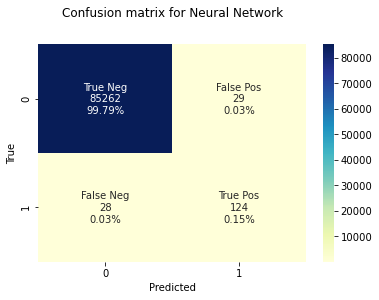

In [ ]:
#Visualize the confusion matrix using seaborn
cf_matrix=confusion_matrix(y_test, y_test_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')

plt.title('Confusion matrix for Neural Network', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

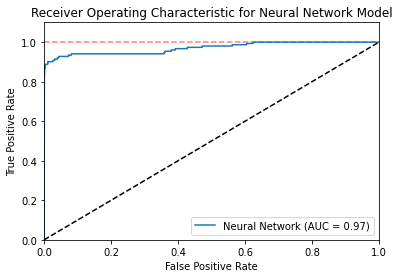

In [ ]:
# Manually plot ROC curve

y_test_prob = model.predict(X_test)
false_positive, true_positive, threshold = metrics.roc_curve(y_test, y_test_prob, 
                                                             drop_intermediate = False)

roc_auc = metrics.auc(false_positive, true_positive)

plt.title('Receiver Operating Characteristic for Neural Network Model')
plt.plot(false_positive, true_positive, label = f'Neural Network (AUC = {roc_auc:0.2f})')
plt.legend(loc = 'lower right')
# Plot baseline ROC curve
plt.plot([0,1],[0,1],c = 'black', linestyle = 'dashed')
# Plot line at TPR = 1.0 to illustrate the FPR at which the ROC curve intersects
plt.hlines(1.0, 0, 1, colors = 'red', linestyles = 'dashed', alpha = 0.5)


plt.xlim([0,1])
plt.xlabel('False Positive Rate')

plt.ylim([0,1.1])
plt.ylabel('True Positive Rate')

plt.show()

##### Work Cited
* <https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/>

*Want to try voting but switching to the paper, and will try if time prevails

## PCA-1 Augmentation

In [ ]:
from sklearn.decomposition import PCA
# Refresh to original features
df = pd.read_csv('.\\Documents\\Projects\\fraudject TURBO\\creditcard.csv')
features = df.drop('Class', axis = 1)
target = df['Class']

# Instantiate PCA model then get transformed variables
pca = PCA(n_components = 1)

pc_features = pca.fit_transform(features)

In [ ]:
# Reconstruct feature vectors from PCA model
pc_one = pca.inverse_transform(pc_features)
# Calculate featurewise difference from reconstruction
recon_error = np.subtract(features.values,pc_one)
# Make differences absolute values
recon_error = np.abs(recon_error)
# Sum features to get aggregate reconstruction error
recon_error = recon_error.sum(axis = 1)

In [ ]:
# Create separate dataframe with reconstruction error
features_pc1 = features.copy()
features_pc1['Recon Error'] = recon_error

features_pc1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Recon Error
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,67.375493
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,101.100442
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,306.304097
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,46.744139
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,37.976480


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_pc1, target, test_size=0.3, random_state=3)

### Logistic regression, PCA-1 augmented dataset

In [ ]:
start_time = time.time()
LogReg_pc1 = LogisticRegressionCV(max_iter = 4000, random_state = 123,
                                  class_weight='balanced')

LogReg_pc1.fit(X_train, y_train)
end_time = time.time()

print(f'Process time: {((end_time-start_time)/60):.1f} minutes')

# Predict the response for the test set
y_pred = LogReg_pc1.predict(X_test)
# Find the accuracy, precision, and recall
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Logistic Regression Precision:", metrics.precision_score(y_test, y_pred))
print("Logistic Regression Recall:", metrics.recall_score(y_test, y_pred))

Process time: 0.2 minutes
Logistic Regression Accuracy: 0.9797291761759301
Logistic Regression Precision: 0.07389428263214672
Logistic Regression Recall: 0.9013157894736842


In [ ]:
# Look at Classification Report
print(classification_report(y_test, y_pred))
# Confusion Matrix
cf_matrix=confusion_matrix(y_test, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85291
           1       0.07      0.90      0.14       152

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443

[[83574  1717]
 [   15   137]]


Text(0.5, 15.0, 'Predicted')

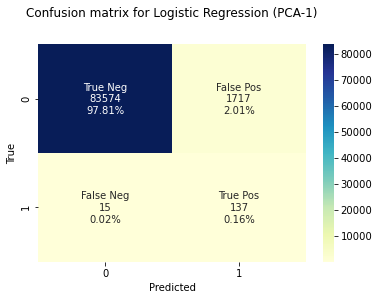

In [ ]:
#Visualize the confusion matrix using seaborn
cf_matrix=confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')

plt.title('Confusion matrix for Logistic Regression (PCA-1)', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

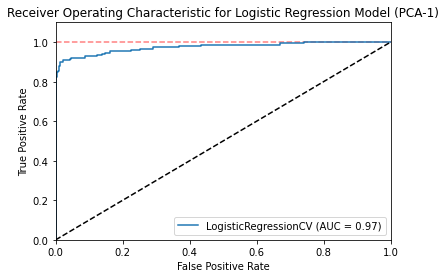

In [ ]:
roc_plot_enhanced(LogReg_pc1, X_test, y_test,
                  title = 'Receiver Operating Characteristic for Logistic Regression Model (PCA-1)')

### SVM, PCA-1 augmented dataset

Unused due to excessive computation time

In [ ]:
# #Create a SVM Classifier
# start_time = time.time()
# SVMclf_pc1 = svm.SVC(kernel='linear',random_state = 123, C = 0.1,
#                      class_weight = 'balanced')

# #Train the model using the training sets
# SVMclf_pc1.fit(X_train, y_train)
# end_time = time.time()
# print(f'Grid search process time: {((end_time-start_time)/60):.1f} minutes')
# #Predict the response for test dataset
# y_pred_svm = SVMclf_pc1.predict(X_test)

# #Find the accuracy, precision, and recall
# print("SVM Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))
# print("SVM Precision:", metrics.precision_score(y_test, y_pred_svm))
# print("SVM Recall:", metrics.recall_score(y_test, y_pred_svm))

In [ ]:
# #Visualize the confusion matrix using seaborn
# cf_matrix=confusion_matrix(y_test, y_pred_svm)
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in
#                 cf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')

# plt.title('Confusion matrix for SVM', y=1.1)
# plt.ylabel('True')
# plt.xlabel('Predicted')

In [ ]:
# roc_plot_enhanced(SVMclf_pc1, X_test, y_test, title = 'Support Vector Machine')

### Random Forest, PCA-1 augmented dataset

In [ ]:
#Create a Random Forest Classifier
start_time = time.time()
rf_clf_pc1 = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state= 123, 
                                    class_weight= 'balanced')

#Train the model using the training sets
rf_clf_pc1.fit(X_train, y_train)
end_time = time.time()
print(f'Model training process time: {((end_time-start_time)/60):.1f} minutes')

#Predict the response for test dataset
y_pred_rf = rf_clf_pc1.predict(X_test)

#Find the accuracy, precision, and recall
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", metrics.precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", metrics.recall_score(y_test, y_pred_rf))

Model training process time: 0.3 minutes
Random Forest Accuracy: 0.9973549617873905
Random Forest Precision: 0.3885542168674699
Random Forest Recall: 0.8486842105263158


In [ ]:
#Look at Classification Report
print(classification_report(y_test, y_pred_rf))
# Confusion Matrix
cf_matrix=confusion_matrix(y_test, y_pred_rf)
print(cf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.39      0.85      0.53       152

    accuracy                           1.00     85443
   macro avg       0.69      0.92      0.77     85443
weighted avg       1.00      1.00      1.00     85443

[[85088   203]
 [   23   129]]


Text(0.5, 15.0, 'Predicted')

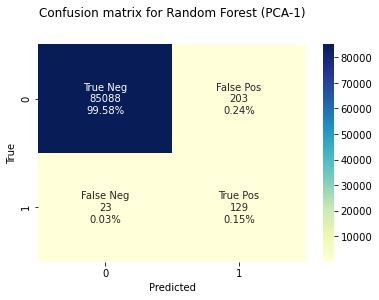

In [ ]:
#Visualize the confusion matrix using seaborn
cf_matrix=confusion_matrix(y_test, y_pred_rf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')

plt.title('Confusion matrix for Random Forest (PCA-1)', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

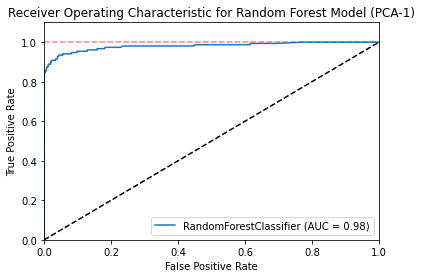

In [ ]:
roc_plot_enhanced(rf_clf_pc1, X_test, y_test, 
                  title = 'Receiver Operating Characteristic for Random Forest Model (PCA-1)')

### Neural Net, PCA-1 Augmented dataset

In [ ]:
#Standardize the data
pc1_scaled = preprocessing.scale(features_pc1)
pc1_scaled = pd.DataFrame(pc1_scaled, columns=features_pc1.columns)
pc1_scaled['Class'] = target

pc1_features = pc1_scaled.drop(['Class'], axis = 1)
target = pc1_scaled['Class']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(pc1_features, target, test_size=0.3, random_state=3)


In [ ]:
pc1_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Recon Error,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.233949,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.088329,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0.797720,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.323033,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.360891,0


In [ ]:
#Neural Network Attempts
#use a sequential class from Keras
model_pc1 = Sequential()
model_pc1.add(Dense(32, input_dim=31, activation='relu'))
model_pc1.add(Dense(16, activation='relu'))
model_pc1.add(Dense(1, activation='sigmoid'))

#Use ‘adam’ optimizer and ‘binary crossentropy’ loss.
model_pc1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#100 epochs
start_time = time.time()
model_pc1.fit(X_train, y_train, epochs=100)

end_time = time.time()
print(f'Process time: {((end_time-start_time)/60):.1f} minutes')

Epoch 1/100
6231/6231 [==============================] - 3s 471us/step - loss: 0.0123 - accuracy: 0.9968
Epoch 2/100
6231/6231 [==============================] - 3s 473us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 3/100
6231/6231 [==============================] - 3s 475us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 4/100
6231/6231 [==============================] - 3s 468us/step - loss: 0.0026 - accuracy: 0.9995
Epoch 5/100
6231/6231 [==============================] - 3s 465us/step - loss: 0.0024 - accuracy: 0.9994
Epoch 6/100
6231/6231 [==============================] - 3s 463us/step - loss: 0.0022 - accuracy: 0.9995
Epoch 7/100
6231/6231 [==============================] - 3s 459us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 8/100
6231/6231 [==============================] - 3s 457us/step - loss: 0.0020 - accuracy: 0.9996
Epoch 9/100
6231/6231 [==============================] - 3s 468us/step - loss: 0.0018 - accuracy: 0.9996
Epoch 10/100
6231/6231 [==============================]

In [ ]:
#Predict the response for test dataset
y_test_pred = model_pc1.predict_classes(X_test)

#Find the accuracy, precision, and recall
print("Neural Network Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Neural Network Precision:", metrics.precision_score(y_test, y_test_pred))
print("Neural Network Recall:", metrics.recall_score(y_test, y_test_pred))

Neural Network Accuracy: 0.9992977774656788
Neural Network Precision: 0.8108108108108109
Neural Network Recall: 0.7894736842105263


In [ ]:
print(classification_report(y_test, y_test_pred))
# Confusion Matrix
cf_matrix=confusion_matrix(y_test, y_test_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.81      0.79      0.80       152

    accuracy                           1.00     85443
   macro avg       0.91      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443

[[85263    28]
 [   32   120]]


Text(0.5, 15.0, 'Predicted')

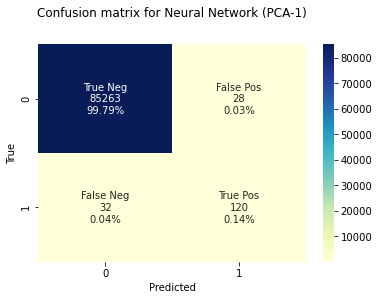

In [ ]:
#Visualize the confusion matrix using seaborn
cf_matrix=confusion_matrix(y_test, y_test_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')

plt.title('Confusion matrix for Neural Network (PCA-1)', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

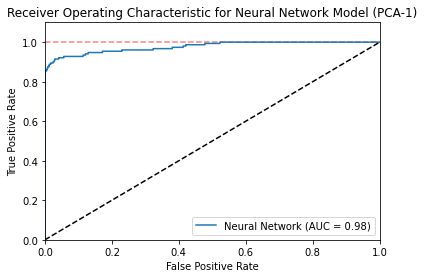

In [ ]:
# Manually plot ROC curve

y_test_prob = model_pc1.predict(X_test)
false_positive, true_positive, threshold = metrics.roc_curve(y_test, y_test_prob, 
                                                             drop_intermediate = False)

roc_auc = metrics.auc(false_positive, true_positive)

plt.title('Receiver Operating Characteristic for Neural Network Model (PCA-1)')
plt.plot(false_positive, true_positive, label = f'Neural Network (AUC = {roc_auc:0.2f})')
plt.legend(loc = 'lower right')
# Plot baseline ROC curve
plt.plot([0,1],[0,1],c = 'black', linestyle = 'dashed')
# Plot line at TPR = 1.0 to illustrate the FPR at which the ROC curve intersects
plt.hlines(1.0, 0, 1, colors = 'red', linestyles = 'dashed', alpha = 0.5)


plt.xlim([0,1])
plt.xlabel('False Positive Rate')

plt.ylim([0,1.1])
plt.ylabel('True Positive Rate')


plt.show()